In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm.auto import tqdm

import sys
sys.path.append('../utils')
from utils import *
from data_retrieve import *
from gbm import *

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
last_id = 287
backtest_start = 187
backtest_end = 252

prices = []
for current_id in tqdm(range(backtest_start, backtest_end)):
    payoff = []
    result, _, discounts = MultivariateGBMSimulationTS(s0=close.iloc[current_id], n_paths=100, current_id=current_id, window_size=30)
    
    old_path_rog = combined_df['ROG_Last_Price'].iloc[:current_id]
    old_path_cfr = combined_df['CFR_Last_Price'].iloc[:current_id]
    old_path_zurn = combined_df['ZURN_Last_Price'].iloc[:current_id]

    for i in range(result.shape[1]):
        path_rog = np.append(old_path_rog, result[0][i].flatten())
        path_cfr = np.append(old_path_cfr, result[1][i].flatten())
        path_zurn = np.append(old_path_zurn, result[2][i].flatten())

        payoff.append(payoff_func(path_rog, path_cfr, path_zurn, combined_df.iloc[current_id]['Date'], risk_free=discounts, risk_neutral=False, verbose=False))
    
    prices.append(np.mean(payoff))



  0%|          | 0/65 [00:00<?, ?it/s]

GBM days: 100
[0, 0, 0, 35, 100, 100]
100


100%|██████████| 100/100 [00:00<00:00, 124.31it/s]


1.0335933760086327


  2%|▏         | 1/65 [00:01<01:20,  1.25s/it]

GBM days: 99
[0, 0, 0, 34, 99, 99]
99


100%|██████████| 100/100 [00:00<00:00, 124.21it/s]


1.0336840945048327


  3%|▎         | 2/65 [00:02<01:16,  1.21s/it]

GBM days: 98
[0, 0, 0, 33, 98, 98]
98


  5%|▍         | 3/65 [00:03<01:10,  1.14s/it]

1.0336293648316763
GBM days: 97
[0, 0, 0, 32, 97, 97]
97


100%|██████████| 100/100 [00:00<00:00, 133.23it/s]


1.0341251414154147


  6%|▌         | 4/65 [00:04<01:08,  1.12s/it]

GBM days: 96
[0, 0, 0, 31, 96, 96]
96


100%|██████████| 100/100 [00:00<00:00, 139.11it/s]


1.0342357879703665


  8%|▊         | 5/65 [00:05<01:06,  1.10s/it]

GBM days: 95
[0, 0, 0, 29, 94, 94]
94


100%|██████████| 100/100 [00:00<00:00, 114.51it/s]


1.0349977731217666


  9%|▉         | 6/65 [00:07<01:10,  1.20s/it]

GBM days: 94
[0, 0, 0, 28, 93, 93]
93


100%|██████████| 100/100 [00:00<00:00, 136.34it/s]


1.035503104958137


 11%|█         | 7/65 [00:08<01:10,  1.21s/it]

GBM days: 93
[0, 0, 0, 27, 92, 92]
92


100%|██████████| 100/100 [00:00<00:00, 125.96it/s]


1.035767145123031


 12%|█▏        | 8/65 [00:09<01:08,  1.21s/it]

GBM days: 92
[0, 0, 0, 26, 91, 91]
91


100%|██████████| 100/100 [00:00<00:00, 142.16it/s]


1.0349705576602277


 14%|█▍        | 9/65 [00:10<01:04,  1.15s/it]

GBM days: 91
[0, 0, 0, 25, 90, 90]
90


100%|██████████| 100/100 [00:00<00:00, 146.70it/s]


1.0353177307222954


 15%|█▌        | 10/65 [00:11<01:00,  1.10s/it]

GBM days: 90
[0, 0, 0, 24, 89, 89]
89


100%|██████████| 100/100 [00:00<00:00, 123.45it/s]


1.0352062197130194


 17%|█▋        | 11/65 [00:12<01:00,  1.12s/it]

GBM days: 89
[0, 0, 0, 23, 88, 88]
88


100%|██████████| 100/100 [00:00<00:00, 144.11it/s]


1.035586057076571


 18%|█▊        | 12/65 [00:13<00:57,  1.09s/it]

GBM days: 88
[0, 0, 0, 22, 87, 87]
87


100%|██████████| 100/100 [00:00<00:00, 148.21it/s]


1.0370029759966908


 20%|██        | 13/65 [00:14<00:54,  1.06s/it]

GBM days: 87
[0, 0, 0, 21, 86, 86]
86


100%|██████████| 100/100 [00:00<00:00, 150.99it/s]


1.0373151306071993


 22%|██▏       | 14/65 [00:15<00:52,  1.03s/it]

GBM days: 86
[0, 0, 0, 20, 85, 85]
85


100%|██████████| 100/100 [00:00<00:00, 128.25it/s]


1.0364016250906045


 23%|██▎       | 15/65 [00:16<00:54,  1.08s/it]

GBM days: 85
[0, 0, 0, 19, 84, 84]
84


100%|██████████| 100/100 [00:00<00:00, 130.28it/s]


1.0365212570188926


 25%|██▍       | 16/65 [00:17<00:52,  1.08s/it]

GBM days: 84
[0, 0, 0, 18, 83, 83]
83


 26%|██▌       | 17/65 [00:18<00:49,  1.04s/it]

1.036918228914272
GBM days: 83
[0, 0, 0, 17, 82, 82]
82


100%|██████████| 100/100 [00:00<00:00, 151.87it/s]


1.0381237290512126


 28%|██▊       | 18/65 [00:19<00:47,  1.01s/it]

GBM days: 82
[0, 0, 0, 16, 81, 81]
81


100%|██████████| 100/100 [00:00<00:00, 169.97it/s]


1.0380449217340038


 29%|██▉       | 19/65 [00:20<00:44,  1.04it/s]

GBM days: 81
[0, 0, 0, 15, 80, 80]
80


100%|██████████| 100/100 [00:00<00:00, 158.47it/s]


1.0370491958960442


 31%|███       | 20/65 [00:21<00:42,  1.05it/s]

GBM days: 80
[0, 0, 0, 14, 79, 79]
79


100%|██████████| 100/100 [00:00<00:00, 146.62it/s]


1.0370363597604604


 32%|███▏      | 21/65 [00:22<00:42,  1.03it/s]

GBM days: 79
[0, 0, 0, 13, 78, 78]
78


 34%|███▍      | 22/65 [00:23<00:43,  1.01s/it]

1.03820300950064
GBM days: 78
[0, 0, 0, 12, 77, 77]
77


100%|██████████| 100/100 [00:00<00:00, 137.84it/s]


1.0369725371451781


 35%|███▌      | 23/65 [00:24<00:44,  1.05s/it]

GBM days: 77
[0, 0, 0, 11, 76, 76]
76


 37%|███▋      | 24/65 [00:25<00:41,  1.02s/it]

1.037646401955794
GBM days: 76
[0, 0, 0, 10, 75, 75]
75


100%|██████████| 100/100 [00:00<00:00, 138.34it/s]


1.037699404383087


 38%|███▊      | 25/65 [00:26<00:41,  1.03s/it]

GBM days: 75
[0, 0, 0, 9, 74, 74]
74


100%|██████████| 100/100 [00:00<00:00, 154.62it/s]


1.0377910839405082


 40%|████      | 26/65 [00:27<00:38,  1.00it/s]

GBM days: 74
[0, 0, 0, 8, 73, 73]
73


100%|██████████| 100/100 [00:00<00:00, 178.17it/s]


1.0381476570927635


 42%|████▏     | 27/65 [00:28<00:36,  1.04it/s]

GBM days: 73
[0, 0, 0, 7, 72, 72]
72


100%|██████████| 100/100 [00:00<00:00, 127.02it/s]


1.0384833702312821


 43%|████▎     | 28/65 [00:29<00:39,  1.06s/it]

GBM days: 72
[0, 0, 0, 6, 71, 71]
71


100%|██████████| 100/100 [00:01<00:00, 99.72it/s]


1.0388167633034526


 45%|████▍     | 29/65 [00:31<00:44,  1.23s/it]

GBM days: 71
[0, 0, 0, 5, 70, 70]
70


100%|██████████| 100/100 [00:01<00:00, 89.51it/s]


1.0379997206205254


 46%|████▌     | 30/65 [00:33<00:47,  1.35s/it]

GBM days: 70
[0, 0, 0, 4, 69, 69]
69


100%|██████████| 100/100 [00:01<00:00, 89.08it/s]


1.0374321339741917


 48%|████▊     | 31/65 [00:34<00:49,  1.45s/it]

GBM days: 69
[0, 0, 0, 3, 68, 68]
68


100%|██████████| 100/100 [00:00<00:00, 100.35it/s]


1.0393131530887287


 49%|████▉     | 32/65 [00:36<00:48,  1.48s/it]

GBM days: 68
[0, 0, 0, 2, 67, 67]
67


100%|██████████| 100/100 [00:01<00:00, 92.94it/s]


1.0387047169358956


 51%|█████     | 33/65 [00:37<00:48,  1.51s/it]

GBM days: 67
[0, 0, 0, 1, 66, 66]
66


100%|██████████| 100/100 [00:01<00:00, 95.90it/s]


1.0386307167575586


 52%|█████▏    | 34/65 [00:39<00:47,  1.54s/it]

GBM days: 66
[0, 0, 0, 0, 65, 65]
65


100%|██████████| 100/100 [00:01<00:00, 95.24it/s]


1.0404239880819586


 54%|█████▍    | 35/65 [00:41<00:46,  1.55s/it]

GBM days: 65
[0, 0, 0, 0, 64, 64]
64


100%|██████████| 100/100 [00:01<00:00, 93.77it/s]


1.0408856679667708


 55%|█████▌    | 36/65 [00:42<00:45,  1.56s/it]

GBM days: 64
[0, 0, 0, 0, 63, 63]
63


100%|██████████| 100/100 [00:01<00:00, 97.83it/s]


1.041947510562968


 57%|█████▋    | 37/65 [00:44<00:43,  1.55s/it]

GBM days: 63
[0, 0, 0, 0, 62, 62]
62


100%|██████████| 100/100 [00:00<00:00, 106.04it/s]


1.0417981135611376


 58%|█████▊    | 38/65 [00:45<00:41,  1.54s/it]

GBM days: 62
[0, 0, 0, 0, 61, 61]
61


100%|██████████| 100/100 [00:00<00:00, 113.89it/s]


1.04039321030224


 60%|██████    | 39/65 [00:47<00:38,  1.48s/it]

GBM days: 61
[0, 0, 0, 0, 60, 60]
60


100%|██████████| 100/100 [00:01<00:00, 98.49it/s]


1.0411125180873686


 62%|██████▏   | 40/65 [00:48<00:37,  1.50s/it]

GBM days: 60
[0, 0, 0, 0, 59, 59]
59


100%|██████████| 100/100 [00:00<00:00, 115.76it/s]


1.039692552761202


 63%|██████▎   | 41/65 [00:50<00:34,  1.45s/it]

GBM days: 59
[0, 0, 0, 0, 58, 58]
58


100%|██████████| 100/100 [00:00<00:00, 105.39it/s]


1.0411231728878958


 65%|██████▍   | 42/65 [00:51<00:33,  1.44s/it]

GBM days: 58
[0, 0, 0, 0, 57, 57]
57


100%|██████████| 100/100 [00:00<00:00, 119.72it/s]


1.0411377835354758


 66%|██████▌   | 43/65 [00:52<00:30,  1.36s/it]

GBM days: 57
[0, 0, 0, 0, 56, 56]
56


100%|██████████| 100/100 [00:00<00:00, 122.87it/s]


1.0404851263556518


 68%|██████▊   | 44/65 [00:53<00:28,  1.35s/it]

GBM days: 56
[0, 0, 0, 0, 55, 55]
55


100%|██████████| 100/100 [00:00<00:00, 107.58it/s]


1.041158980908142


 69%|██████▉   | 45/65 [00:55<00:26,  1.32s/it]

GBM days: 55
[0, 0, 0, 0, 54, 54]
54


100%|██████████| 100/100 [00:00<00:00, 133.95it/s]


1.041208529708986


 71%|███████   | 46/65 [00:56<00:24,  1.26s/it]

GBM days: 54
[0, 0, 0, 0, 53, 53]
53


100%|██████████| 100/100 [00:00<00:00, 119.23it/s]


1.0419091010264252


 72%|███████▏  | 47/65 [00:57<00:23,  1.31s/it]

GBM days: 53
[0, 0, 0, 0, 52, 52]
52


100%|██████████| 100/100 [00:00<00:00, 126.58it/s]


1.0411882694137402


 74%|███████▍  | 48/65 [00:58<00:21,  1.27s/it]

GBM days: 52
[0, 0, 0, 0, 51, 51]
51


100%|██████████| 100/100 [00:00<00:00, 132.31it/s]


1.0408931109991824


 75%|███████▌  | 49/65 [01:00<00:19,  1.23s/it]

GBM days: 51
[0, 0, 0, 0, 50, 50]
50


100%|██████████| 100/100 [00:00<00:00, 120.90it/s]


1.0395818735569946


 77%|███████▋  | 50/65 [01:01<00:18,  1.25s/it]

GBM days: 50
[0, 0, 0, 0, 49, 49]
49


100%|██████████| 100/100 [00:00<00:00, 143.85it/s]


1.0401577875282986


 78%|███████▊  | 51/65 [01:02<00:16,  1.20s/it]

GBM days: 49
[0, 0, 0, 0, 48, 48]
48


100%|██████████| 100/100 [00:00<00:00, 133.47it/s]


1.0405596584806285


 80%|████████  | 52/65 [01:03<00:15,  1.21s/it]

GBM days: 48
[0, 0, 0, 0, 47, 47]
47


100%|██████████| 100/100 [00:00<00:00, 150.40it/s]


1.0403620968631733


 82%|████████▏ | 53/65 [01:04<00:14,  1.18s/it]

GBM days: 47
[0, 0, 0, 0, 46, 46]
46


100%|██████████| 100/100 [00:00<00:00, 137.59it/s]


1.0408957569828265


 83%|████████▎ | 54/65 [01:05<00:12,  1.16s/it]

GBM days: 46
[0, 0, 0, 0, 45, 45]
45


100%|██████████| 100/100 [00:00<00:00, 134.75it/s]


1.04051119845053


 85%|████████▍ | 55/65 [01:07<00:11,  1.15s/it]

GBM days: 45
[0, 0, 0, 0, 44, 44]
44


100%|██████████| 100/100 [00:00<00:00, 134.62it/s]


1.041734668693035


 86%|████████▌ | 56/65 [01:08<00:10,  1.14s/it]

GBM days: 44
[0, 0, 0, 0, 43, 43]
43


100%|██████████| 100/100 [00:00<00:00, 156.85it/s]


1.0416452382920853


 88%|████████▊ | 57/65 [01:09<00:08,  1.10s/it]

GBM days: 43
[0, 0, 0, 0, 42, 42]
42


100%|██████████| 100/100 [00:00<00:00, 137.05it/s]


1.0418906414427282


 89%|████████▉ | 58/65 [01:10<00:07,  1.13s/it]

GBM days: 42
[0, 0, 0, 0, 41, 41]
41


100%|██████████| 100/100 [00:00<00:00, 142.99it/s]


1.042637939995096


 91%|█████████ | 59/65 [01:11<00:06,  1.13s/it]

GBM days: 41
[0, 0, 0, 0, 40, 40]
40


100%|██████████| 100/100 [00:00<00:00, 162.95it/s]


1.0418049094005781


 92%|█████████▏| 60/65 [01:12<00:05,  1.09s/it]

GBM days: 40
[0, 0, 0, 0, 39, 39]
39


100%|██████████| 100/100 [00:00<00:00, 174.02it/s]


1.042796549777323


 94%|█████████▍| 61/65 [01:13<00:04,  1.05s/it]

GBM days: 39
[0, 0, 0, 0, 38, 38]
38


100%|██████████| 100/100 [00:00<00:00, 150.29it/s]


1.042085685083489


 95%|█████████▌| 62/65 [01:14<00:03,  1.05s/it]

GBM days: 38
[0, 0, 0, 0, 37, 37]
37


100%|██████████| 100/100 [00:00<00:00, 174.94it/s]


1.0412433296380557


 97%|█████████▋| 63/65 [01:15<00:02,  1.03s/it]

GBM days: 37
[0, 0, 0, 0, 36, 36]
36


100%|██████████| 100/100 [00:00<00:00, 176.99it/s]


1.040869637563742


 98%|█████████▊| 64/65 [01:16<00:00,  1.00it/s]

GBM days: 36
[0, 0, 0, 0, 35, 35]
35


100%|██████████| 100/100 [00:00<00:00, 187.00it/s]


1.0412757521593412


100%|██████████| 65/65 [01:17<00:00,  1.19s/it]


In [3]:
prices

[1001.0694237124229,
 1000.9809650181201,
 1001.0348354818934,
 1000.5500200538225,
 1000.4405811554927,
 999.4565640693925,
 998.973015055341,
 998.7085853979021,
 999.4939263987147,
 995.3259911191598]

In [7]:
last_id = 287
backtest_start = 187
backtest_end = 197

prices = []
for current_id in tqdm(range(backtest_start, backtest_end)):
    payoff = []
    result, _ = MultivariateGBMSimulationEMS(s0=close.iloc[current_id], n_paths=100, current_id=current_id, window_size=30)
    
    old_path_rog = combined_df['ROG_Last_Price'].iloc[:current_id]
    old_path_cfr = combined_df['CFR_Last_Price'].iloc[:current_id]
    old_path_zurn = combined_df['ZURN_Last_Price'].iloc[:current_id]

    for i in range(result.shape[1]):
        path_rog = np.append(old_path_rog, result[0][i].flatten())
        path_cfr = np.append(old_path_cfr, result[1][i].flatten())
        path_zurn = np.append(old_path_zurn, result[2][i].flatten())

        payoff.append(payoff_func(path_rog, path_cfr, path_zurn, combined_df.iloc[current_id]['Date'], risk_free=0.01107, risk_neutral=True, verbose=False))
    
    prices.append(np.mean(payoff))



100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


In [8]:
prices

[1030.5131853683367,
 1030.5584553347237,
 1030.603727289799,
 1030.6490012336503,
 1030.6942771663648,
 1030.7848349987341,
 1030.8301168985631,
 1026.3436598330395,
 1030.9206866659474,
 1030.9659745336774]

d:\mh4518_simulation_in_fin\notebooks\../utils\utils.py:143: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  real_price['Date'] = pd.to_datetime(real_price['Date'], dayfirst=True)


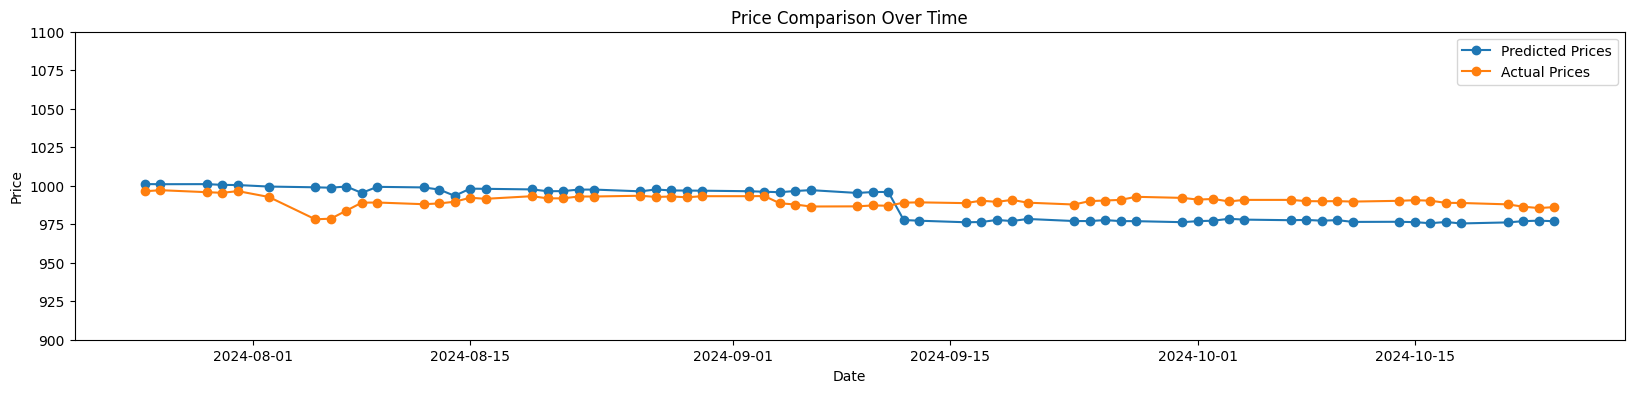

In [6]:
last_id = 287
backtest_start = 187
backtest_end = 252
combined_df = retrieve_data()

evaluation_plot(
    backtest_start,
    backtest_end,
    combined_df,
    prices
    )